In [ ]:
**March Madness Analysis

In [ ]:
Rayshawn Bray

In [ ]:
IST 652 Scripting Data Analysis

In [1]:
#Before getting started, I'm going to load all the necessary librarires for the analysis

import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Now let's change the current Working Directory so it's easier to upload my Data

os.chdir('/Users/Rayshawn/Desktop/college-basketball-dataset')
os.getcwd()

'/Users/Rayshawn/Desktop/college-basketball-dataset'

In [ ]:
'''
The first Question I'm answering is: What Conferences Sends the most teams to the tournament each year?
Plan of Action:

1.Load all the datasets.
2.Starting with 2015, inspect the dataset.
3.Make sure the data is loaded properly.
4.Check for NA's.
5.Find out how many teams are in each Conference.
6.Find out how many teams make it to the tournamnet.
7.Make an array of all the rounds in tournament.
     This has to be done because the different levels represent where a team exits.
     For example, if I want to see all the teams that made it to the final four, I need
     the levels of Champions, 2nd, and F4. 
8.Make a new Dataframe with what I'm looking for.
9.Plot Results.
10.Repeat some steps for years 2016-2019 but mainly get plots so it's easy to read and anlyze my code.
11.I'll do the full process for 2015, it's not needeed for the rest tho.
     This is because the same amount of teams make it to the tournamnet every year.
     The exploratory steps aren't need for the other years, just the plots

NA's:
For this project, I'm leaving the NA's because it shows how many teams didn't make the tournament and
it's really easy to exclude them when I manipulate the data. I also don't need to do any additional data
cleaning since the data came clean and in a format that's ready for me to use.

Notes:
This notebook just contains the code, the anlysis of the results are in the Report.
'''

In [3]:
#Load all Data

df_15 = pd.read_csv('cbb15.csv')
df_16 = pd.read_csv('cbb16.csv')
df_17 = pd.read_csv('cbb17.csv')
df_18 = pd.read_csv('cbb18.csv')
df_19 = pd.read_csv('cbb19.csv')

In [5]:
#Inspect 2015 Data

df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 23 columns):
TEAM          351 non-null object
CONF          351 non-null object
G             351 non-null int64
W             351 non-null int64
ADJOE         351 non-null float64
ADJDE         351 non-null float64
BARTHAG       351 non-null float64
EFG_O         351 non-null float64
EFG_D         351 non-null float64
TOR           351 non-null float64
TORD          351 non-null float64
ORB           351 non-null float64
DRB           351 non-null float64
FTR           351 non-null float64
FTRD          351 non-null float64
2P_O          351 non-null float64
2P_D          351 non-null float64
3P_O          351 non-null float64
3P_D          351 non-null float64
ADJ_T         351 non-null float64
WAB           351 non-null float64
POSTSEASON    68 non-null object
SEED          68 non-null float64
dtypes: float64(18), int64(2), object(3)
memory usage: 63.2+ KB


In [6]:
#Make sure Data loaded properly

df_15.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0
1,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,39.8,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0
2,Arizona,P12,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,...,47.1,37.3,53.3,42.7,36.0,33.5,66.7,9.0,E8,2.0
3,Gonzaga,WCC,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,...,38.7,30.5,57.0,42.0,40.0,33.0,65.2,7.8,E8,2.0
4,Louisville,ACC,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,...,38.7,33.3,48.4,43.3,30.7,30.3,65.6,5.8,E8,4.0


In [7]:
#Check for NA's

df_15.isnull().sum()

TEAM            0
CONF            0
G               0
W               0
ADJOE           0
ADJDE           0
BARTHAG         0
EFG_O           0
EFG_D           0
TOR             0
TORD            0
ORB             0
DRB             0
FTR             0
FTRD            0
2P_O            0
2P_D            0
3P_O            0
3P_D            0
ADJ_T           0
WAB             0
POSTSEASON    283
SEED          283
dtype: int64

In [8]:
#Teams per conference

df_15['CONF'].value_counts()

ACC     15
B10     14
SEC     14
CUSA    14
A10     14
MEAC    13
Slnd    13
MAC     12
P12     12
BSky    12
OVC     12
BSth    11
MWC     11
MAAC    11
SB      11
Amer    11
B12     10
WCC     10
CAA     10
Pat     10
SWAC    10
BE      10
NEC     10
MVC     10
SC      10
AE       9
Horz     9
BW       9
Sum      9
Ivy      8
ASun     8
WAC      8
Ind      1
Name: CONF, dtype: int64

In [12]:
#Teams that qualify for the tournament

df_15['SEED'].notna().sum()

68

In [9]:
#Checking levels on Postseason to make array
#Nan means a team didnt qualify for the tournament.

df_15['POSTSEASON'].unique()

array(['2ND', 'Champions', 'E8', 'F4', nan, 'R32', 'R64', 'R68', 'S16'],
      dtype=object)

In [13]:
#Make array, new dataframe, and check it

array = ['R68','R64', 'R32', 'S16', 'E8','F4','2ND','Champions']
dfpost_15 = df_15.loc[df_15['POSTSEASON'].isin(array)]
dfpost_15.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0
1,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,39.8,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0
2,Arizona,P12,38,34,117.5,86.9,0.9700,53.5,45.1,16.5,...,47.1,37.3,53.3,42.7,36.0,33.5,66.7,9.0,E8,2.0
3,Gonzaga,WCC,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,...,38.7,30.5,57.0,42.0,40.0,33.0,65.2,7.8,E8,2.0
4,Louisville,ACC,36,27,109.4,87.4,0.9290,47.7,44.0,17.2,...,38.7,33.3,48.4,43.3,30.7,30.3,65.6,5.8,E8,4.0


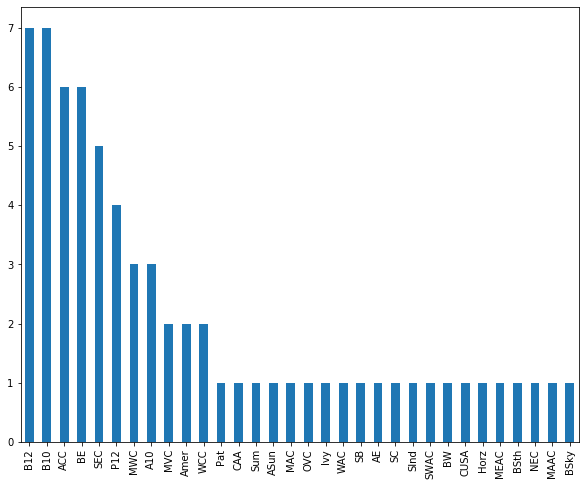

In [14]:
#Plot 2015 Results

dfpost_15['CONF'].value_counts().plot(kind='bar', figsize=(10,8))

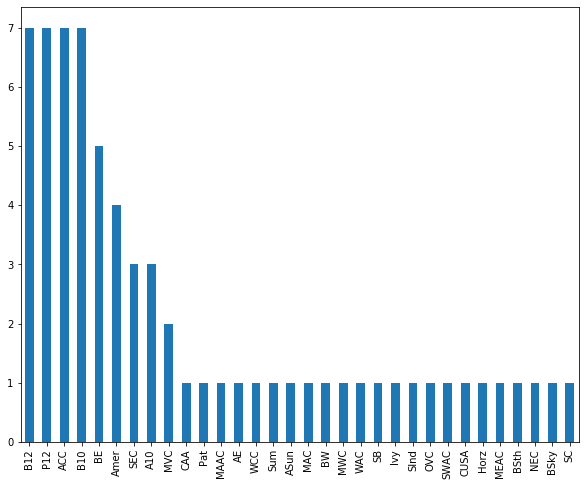

In [18]:
#Plot 2016 Results

array = ['R68','R64', 'R32', 'S16', 'E8','F4','2ND','Champions']
dfpost_16 = df_16.loc[df_16['POSTSEASON'].isin(array)]
dfpost_16['CONF'].value_counts().plot(kind='bar', figsize=(10,8))

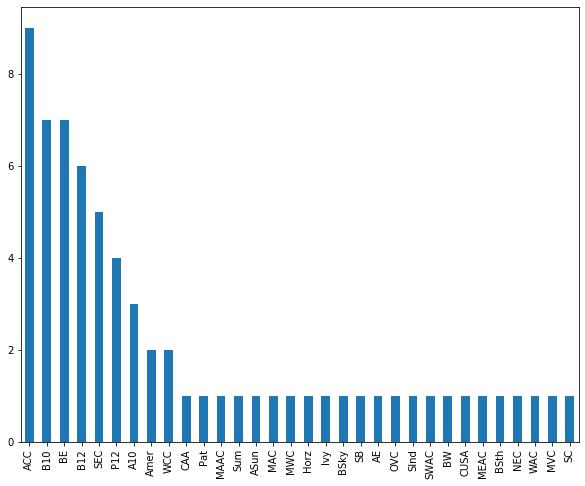

In [16]:
#Plot 2017 Results

array = ['R68','R64', 'R32', 'S16', 'E8','F4','2ND','Champions']
dfpost_17 = df_17.loc[df_17['POSTSEASON'].isin(array)]
dfpost_17['CONF'].value_counts().plot(kind='bar', figsize=(10,8))

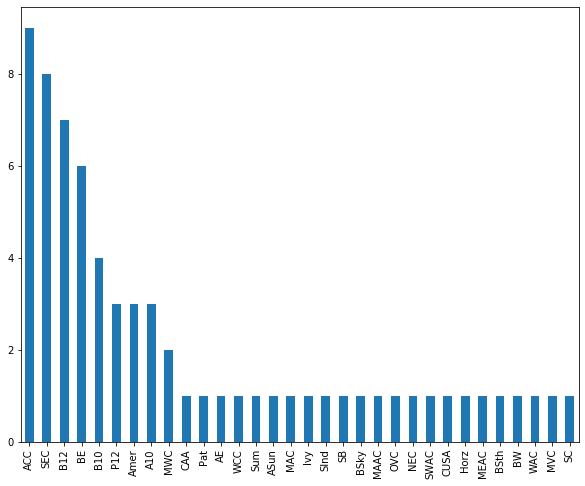

In [19]:
#Plot 2018 Results

array = ['R68','R64', 'R32', 'S16', 'E8','F4','2ND','Champions']
dfpost_18 = df_18.loc[df_18['POSTSEASON'].isin(array)]
dfpost_18['CONF'].value_counts().plot(kind='bar', figsize=(10,8))

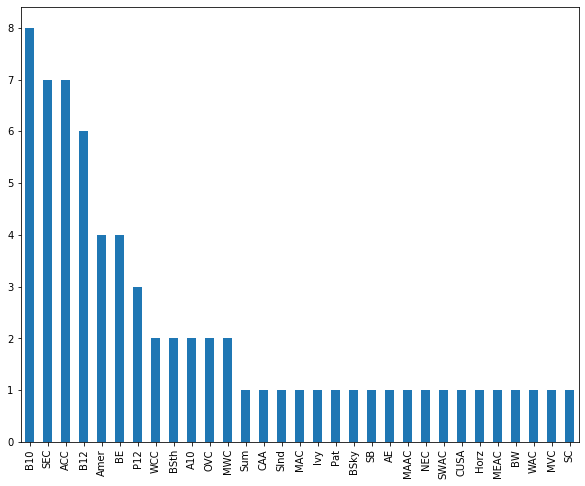

In [20]:
#Plot 2019 Results

array = ['R68','R64', 'R32', 'S16', 'E8','F4','2ND','Champions']
dfpost_19 = df_19.loc[df_19['POSTSEASON'].isin(array)]
dfpost_19['CONF'].value_counts().plot(kind='bar', figsize=(10,8))

In [ ]:
'''
Next Question I'm Answering is: Do 1 seeds have an advantage to win Tournament?
Plan of Action:

1.Load Data
2.Check Data to make sure it's loaded properly
3.Make a Dataframe with all the champions.
4.Check to see how many 1 seeds win the tournamnet

Notes: 
This dataset contains all the same columns from 2015-2019 in 1. It's the master file. I'm using this one for this
question becaues it's easy to filter it to get what I want. Don't need to do any cleaning.
Analysis of the results are in the report.
'''

In [21]:
#Load Data

df_all = pd.read_csv('cbb.csv')
df_all.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [22]:
#Making new dataframe for Champions only and Display Results

df_champs = df_all.loc[df_all['POSTSEASON'] == 'Champions'].sort_values(by='YEAR', ascending=True)
df_champs

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
5,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
7,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017
9,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018
6,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019


In [ ]:
'''
Question: What stats are most important to Winning?/What are stats like of teams that won the tournament?
Plan of Action:

1.Load Data.
2.Delete the Columns Postseason, Seed, and WAB. Check it to make sure it's done right.
     I don't feel like these columns are needed for this.
3.Make Winning Percentage Column.
     I'm doing this because teams play various amounts of games. Winning Percentage is a better target than just Wins.
     It shows how much of the games your team wins based off of how many games your team plays.
4.Drop games and win columns.
5.Run correlation.
6.Based on results, create new dataframe with stats that have highest positve/negative correlation with win percentage.
     Take the top 5 positive and negative.
     Load new dataframe.
     Make win percentage column again.
     Delete unnecessary columns.
     Make array with right postseason levels for new dataframe
     Make new dataframe of final four teams for each year
     Make dataframe of champions
     Print out Averages to get a Profile of a Champion
     
Notes:
Analysis of Results are in the report
'''

In [23]:
#Load data

df_corr = pd.read_csv('cbb.csv')
df_corr.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [24]:
#Delete WAB, POSTSEASON, SEED

df_corr2 = df_corr.copy()
df_corr2.drop(['WAB', 'POSTSEASON', 'SEED'], axis=1, inplace=True)

In [25]:
#Check new dataframe

df_corr2.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2017


In [26]:
#Make winning Percentage Column

df_corr2['w%'] = df_corr2['W']/df_corr2['G']
df_corr2.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,YEAR,w%
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2016,0.825000
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2015,0.900000
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2018,0.825000
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2019,0.815789
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2017,0.948718


In [27]:
#Drop G and W columns

df_corr2.drop(['G', 'W'], axis=1, inplace=True)

In [28]:
#Check dataframe again to make sure it's working

df_corr2

,TEAM,CONF,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,YEAR,w%
0,North Carolina,ACC,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2016,0.825000
1,Wisconsin,B10,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2015,0.900000
2,Michigan,B10,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2018,0.825000
3,Texas Tech,B12,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2019,0.815789
4,Gonzaga,WCC,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2017,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,SEC,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,33.9,27.3,32.0,27.6,52.5,45.7,32.9,32.6,70.3,2018,0.628571
1753,LSU,SEC,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,37.1,33.1,52.9,49.4,31.9,33.7,71.2,2019,0.800000
1754,Tennessee,SEC,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,30.2,33.3,34.9,55.4,44.7,36.7,35.4,68.8,2019,0.861111
1755,Gonzaga,WCC,117.4,94.5,0.9238,55.2,44.8,17.1,15.1,32.1,26.0,34.4,28.1,54.3,44.4,37.8,30.3,68.2,2016,0.771429


In [30]:
#Run correlation
#Top 5 Positive: BARTHAG, ADJOE, EFG_O, 2P_0, 3P_0
#Top 5 Negative: ADJOE, EFG_D, 2P_D, 3P_D, TOR
#Columns to Delete: ORB, TORD, FTR, ADJ_T, FTRD, DRB
#Delete G, W after making new win percentage column

df_corr2.corr()['w%'].sort_values()[:-1]

ADJDE     -0.646726
EFG_D     -0.584527
2P_D      -0.501639
3P_D      -0.477568
TOR       -0.455757
DRB       -0.385050
FTRD      -0.308289
ADJ_T     -0.005526
YEAR       0.100674
FTR        0.127031
TORD       0.149150
ORB        0.274567
3P_O       0.444663
2P_O       0.596497
EFG_O      0.631026
ADJOE      0.714593
BARTHAG    0.771483
Name: w%, dtype: float64

In [31]:
#Load data again

df_win = pd.read_csv('cbb.csv')
df_win.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [33]:
#Make win percentage column

df_win['win%'] = df_win['W']/df_win['G']
df_win.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,win%
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,0.825000
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,0.900000
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,0.825000
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,0.815789
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,0.948718


In [34]:
#Delete Columns ORB, TORD, FTR, ADJ_T, FTRD, DRB, G, W

df_win2 = df_win.copy()
df_win2.drop(['ORB','TORD','FTR','ADJ_T','FTRD','DRB','G','W'], axis=1, inplace=True)

In [35]:
#Check new dataframe

df_win2.head()

,TEAM,CONF,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,2P_O,2P_D,3P_O,3P_D,WAB,POSTSEASON,SEED,YEAR,win%
0,North Carolina,ACC,123.3,94.9,0.9531,52.6,48.1,15.4,53.9,44.6,32.7,36.2,8.6,2ND,1.0,2016,0.825000
1,Wisconsin,B10,129.1,93.6,0.9758,54.8,47.7,12.4,54.8,44.7,36.5,37.5,11.3,2ND,1.0,2015,0.900000
2,Michigan,B10,114.4,90.4,0.9375,53.9,47.7,14.0,54.7,46.8,35.2,33.2,6.9,2ND,3.0,2018,0.825000
3,Texas Tech,B12,115.2,85.2,0.9696,53.5,43.0,17.7,52.8,41.9,36.5,29.7,7.0,2ND,3.0,2019,0.815789
4,Gonzaga,WCC,117.8,86.3,0.9728,56.6,41.1,16.2,56.3,40.0,38.2,29.0,7.7,2ND,1.0,2017,0.948718


In [38]:
#Make Champions Dataframe and Display Results

df_champions = df_win2.loc[df_win2['POSTSEASON'] == 'Champions'].sort_values(by='YEAR', ascending=True)
df_champions

,TEAM,CONF,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,2P_O,2P_D,3P_O,3P_D,WAB,POSTSEASON,SEED,YEAR,win%
5,Duke,ACC,125.2,90.6,0.9764,56.6,46.5,16.3,55.9,46.3,38.7,31.4,10.7,Champions,1.0,2015,0.897436
8,Villanova,BE,123.1,90.9,0.9703,56.1,46.7,16.3,57.4,44.1,36.2,33.9,8.9,Champions,2.0,2016,0.875000
7,North Carolina,ACC,121.0,91.5,0.9615,51.7,48.1,16.2,51.0,46.3,35.5,33.9,8.4,Champions,1.0,2017,0.846154
9,Villanova,BE,128.4,94.1,0.9725,59.5,48.5,15.0,59.0,49.0,40.1,31.7,10.6,Champions,1.0,2018,0.900000
6,Virginia,ACC,123.0,89.9,0.9736,55.2,44.7,14.7,52.5,45.7,39.5,28.9,11.1,Champions,1.0,2019,0.921053


In [57]:
#Save Averages that need to be rounded

avo = df_champions['ADJOE'].mean()
avb = df_champions['BARTHAG'].mean()*100
avfo = df_champions['EFG_O'].mean()
av2o = df_champions['2P_O'].mean()
av2d = df_champions['2P_D'].mean()
av3o = df_champions['3P_O'].mean()
av3d = df_champions['3P_D'].mean()
avw = df_champions['win%'].mean()*100

In [58]:
#Print Champion Averages

print('Champion Averages')

print('Average ADJDE:', df_champions['ADJDE'].mean())
print('Average ADJOE:', round(avo, 2))
print('Avearge BARTHAG:', round(avb, 2))
print('Average EFG_O:', round(avfo, 2))
print('Average EFG_D:', df_champions['EFG_D'].mean())
print('Average TOR:', df_champions['TOR'].mean())
print('Average 2P_O:', round(av2o, 2))
print('Average 2P_D:', round(av2d, 2))
print('Average 3P_O:', round(av3o, 2))
print('Average 3P_D:', round(av3d, 2))
print('Average Win%:', round(avw, 2))

Champion Averages
Average ADJDE: 91.4
Average ADJOE: 124.14
Avearge BARTHAG: 97.09
Average EFG_O: 55.82
Average EFG_D: 46.9
Average TOR: 15.7
Average 2P_O: 55.16
Average 2P_D: 46.28
Average 3P_O: 38.0
Average 3P_D: 31.96
Average Win%: 88.79
